# Data


### international_matches.csv file

# Description


* 23921 rows, 25 columns
* Numerical & Categorical
* Missing Values included 
* Can be used for EDA, Visualization, & machine learning predictions 

### Data Wrangling & cleaning


In [670]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [671]:
df=pd.read_csv("C:/Users/moham/Downloads/international_matches (1).csv")

In [672]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [673]:
df.shape

(23921, 25)

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [675]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [676]:
sum(df.duplicated())

0

In [677]:
pd.set_option('display.max_columns', None)
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [678]:
df.columns = df.columns.str.replace(".", "_", regex=True).str.replace(" ", "_", regex=True).str.lower()
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [679]:
df['away_team'] = df['away_team'].str.replace('[.,\s]+', ' ', regex=True)


In [680]:
df=df.drop(['home_team_continent','away_team_continent','home_team_total_fifa_points','away_team_total_fifa_points','city','tournament','neutral_location'], axis=1)
df.head()

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,country,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [681]:
df.rename(columns={
        'home_team': 'team_A', 
        'away_team': 'team_B', 
        'home_team_fifa_rank': 'team_A_rank', 
        'away_team_fifa_rank': 'team_B_rank',
        'home_team_result': 'team_A_result',
        'home_team_goalkeeper_score': 'team_A_goalkeeper_rate',
        'away_team_goalkeeper_score': 'team_B_goalkeeper_rate',
        'home_team_mean_defense_score': 'team_A_defense_rate',
        'away_team_mean_defense_score': 'team_B_defense_rate',
        'home_team_mean_midfield_score': 'team_A_midfield_rate',
        'away_team_mean_midfield_score': 'team_B_midfield_rate',
        'home_team_mean_offense_score': 'team_A_offense_rate',
        'away_team_mean_offense_score': 'team_B_offense_rate',
        
    }, inplace=True)
df.head()

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [682]:
df[df['team_B'] == "Argentina"]['team_B_midfield_rate'].describe()


count    110.000000
mean      84.720000
std        1.641257
min       82.500000
25%       83.800000
50%       84.000000
75%       85.200000
max       88.500000
Name: team_B_midfield_rate, dtype: float64

In [683]:
cols_to_fillna = ['team_A_goalkeeper_rate', 'team_B_goalkeeper_rate', 'team_A_defense_rate', 'team_B_defense_rate', 
                  'team_A_midfield_rate', 'team_B_midfield_rate', 'team_A_offense_rate', 'team_B_offense_rate']

for col in cols_to_fillna:
    if col.startswith('team_A'):
        team_col = 'team_A'
    else:
        team_col = 'team_B'
    df[col] = round(df.groupby(team_col)[col].transform(lambda x: x.fillna(x.mean())))

In [684]:
df.head()

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,NaN,68.0,72.0,72.0,63.0,68.0,63.0
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0


In [685]:
df[df['team_B'] == "Argentina"]['team_B_midfield_rate'].describe()

count    177.000000
mean      84.796610
std        1.226316
min       82.000000
25%       84.000000
50%       85.000000
75%       85.000000
max       88.000000
Name: team_B_midfield_rate, dtype: float64

In [686]:
df.isnull().sum()

date                         0
team_A                       0
team_B                       0
team_A_rank                  0
team_B_rank                  0
home_team_score              0
away_team_score              0
country                      0
shoot_out                    0
team_A_result                0
team_A_goalkeeper_rate    5683
team_B_goalkeeper_rate    6254
team_A_defense_rate       8019
team_A_offense_rate       6995
team_A_midfield_rate      6955
team_B_defense_rate       8285
team_B_offense_rate       7165
team_B_midfield_rate      7036
dtype: int64

In [687]:
liechtenstein_matches = df[(df['team_A'] == 'Liechtenstein') | (df['team_B'] == 'Liechtenstein')]
liechtenstein_matches

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate
108,1993-10-26,Liechtenstein,Estonia,157,119,0,2,Liechtenstein,No,Lose,65.0,68.0,NaN,NaN,NaN,67.0,62.0,64.0
294,1994-04-20,Northern Ireland,Liechtenstein,35,160,4,1,Northern Ireland,No,Win,73.0,65.0,73.0,69.0,73.0,NaN,NaN,NaN
344,1994-05-27,Switzerland,Liechtenstein,8,158,2,0,Switzerland,No,Win,80.0,65.0,78.0,77.0,79.0,NaN,NaN,NaN
497,1994-09-07,Liechtenstein,Austria,151,37,0,4,Liechtenstein,No,Lose,65.0,75.0,NaN,NaN,NaN,77.0,75.0,78.0
538,1994-10-12,Republic of Ireland,Liechtenstein,12,154,4,0,Republic of Ireland,No,Win,79.0,65.0,77.0,76.0,77.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23605,2022-03-29,Faroe Islands,Liechtenstein,124,191,1,0,Spain,No,Win,61.0,65.0,NaN,NaN,59.0,NaN,NaN,NaN
23701,2022-06-03,Liechtenstein,Moldova,192,180,0,2,Liechtenstein,No,Lose,65.0,65.0,NaN,NaN,NaN,66.0,61.0,64.0
23757,2022-06-06,Latvia,Liechtenstein,135,192,1,0,Latvia,No,Win,65.0,65.0,64.0,67.0,64.0,NaN,NaN,NaN
23832,2022-06-10,Andorra,Liechtenstein,153,192,2,1,Andorra,No,Win,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN


In [688]:
df.fillna(50,inplace=True)

In [689]:
df.isnull().sum()

date                      0
team_A                    0
team_B                    0
team_A_rank               0
team_B_rank               0
home_team_score           0
away_team_score           0
country                   0
shoot_out                 0
team_A_result             0
team_A_goalkeeper_rate    0
team_B_goalkeeper_rate    0
team_A_defense_rate       0
team_A_offense_rate       0
team_A_midfield_rate      0
team_B_defense_rate       0
team_B_offense_rate       0
team_B_midfield_rate      0
dtype: int64

## EDA 

### Top 10 teams rank over time 

In [690]:
df_ranked_teams = pd.DataFrame(columns=['team', 'avg_rank', 'rank_over_time'])

all_teams = df['team_A'].unique()

for team in all_teams:
    team_ranks = df[df['team_A'] == team]['team_A_rank']
    team_ranks = team_ranks.append(df[df['team_B'] == team]['team_B_rank'])
    team_ranks = team_ranks.sort_index()
    avg_rank = team_ranks.mean()
    
    df_ranked_teams = df_ranked_teams.append({'team': team, 'avg_rank': avg_rank}, ignore_index=True)

df_ranked_teams = df_ranked_teams.sort_values(by='avg_rank')

df_ranked_teams['rank_over_time'] = df_ranked_teams.reset_index().index + 1

top_10_ranked_teams = df_ranked_teams.head(10).reset_index()

top_10_ranked_teams[['team', 'rank_over_time', 'avg_rank']]

,team,rank_over_time,avg_rank
0,Brazil,1,3.145497
1,Spain,2,5.418079
2,Argentina,3,6.318801
3,Germany,4,6.474359
4,France,5,8.240541
5,Italy,6,8.883191
6,England,7,9.904192
7,Netherlands,8,9.926471
8,Portugal,9,10.244048
9,Mexico,10,14.504836


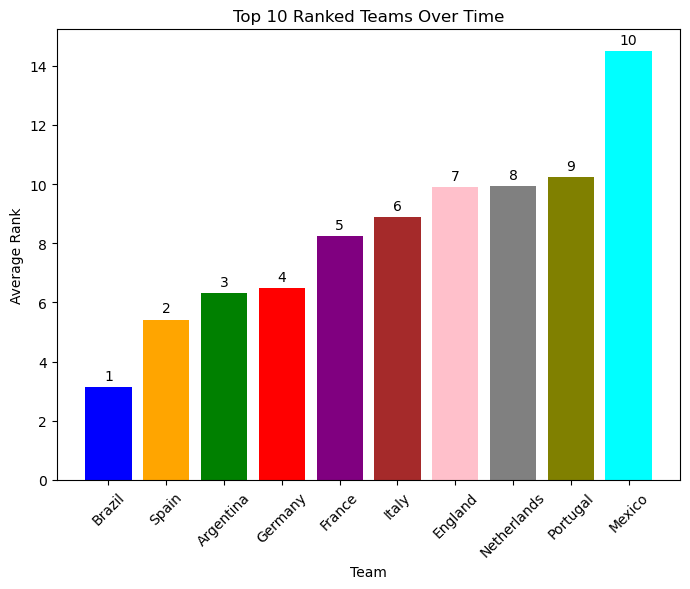

In [691]:
top_10_ranked_teams = top_10_ranked_teams.sort_values(by='rank_over_time')

teams = top_10_ranked_teams['team']
rank_over_time = top_10_ranked_teams['rank_over_time']
avg_rank = top_10_ranked_teams['avg_rank']

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(7, 6))
bars = plt.bar(rank_over_time, avg_rank, color=colors)

plt.xticks(rank_over_time, teams, rotation=45)
plt.xlabel('Team')
plt.ylabel('Average Rank')
plt.title('Top 10 Ranked Teams Over Time')

for bar, rank in zip(bars, rank_over_time):
    plt.annotate(rank, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Last top 10 team rank before the world cup

In [701]:
fifa_rank = df[['date', 'team_A', 'team_B', 'team_A_rank', 'team_B_rank']]
home = fifa_rank[['date', 'team_A', 'team_A_rank']].rename(columns={"team_A": "team", "team_A_rank": "rank"})
away = fifa_rank[['date', 'team_B', 'team_B_rank']].rename(columns={"team_B": "team", "team_B_rank": "rank"})
rank = pd.concat([home, away])

rank = rank.sort_values(['team', 'date'], ascending=[True, False])
rank = rank.groupby('team').first().sort_values('rank', ascending=True)[:].reset_index()

rank['rank'] = rank['rank'].astype(float)
rank.head(10)

,team,date,rank
0,Brazil,2022-06-06,1.0
1,Belgium,2022-06-14,2.0
2,France,2022-06-13,3.0
3,Argentina,2022-06-05,4.0
4,England,2022-06-14,5.0
5,Italy,2022-06-14,6.0
6,Spain,2022-06-12,7.0
7,Portugal,2022-06-12,8.0
8,Mexico,2022-06-14,9.0
9,Netherlands,2022-06-14,10.0


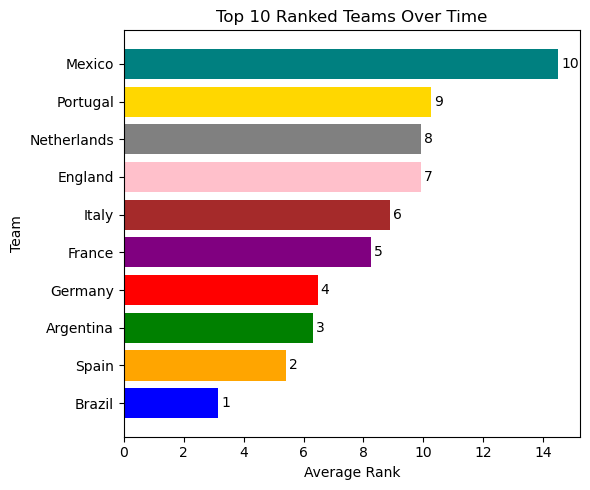

In [702]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'gold', 'teal']

top_10_ranked_teams.sort_values(by='rank_over_time', inplace=True)
plt.figure(figsize=(6, 5))

bars = plt.barh(top_10_ranked_teams['team'], top_10_ranked_teams['avg_rank'], color=colors)
plt.xlabel('Average Rank')
plt.ylabel('Team')
plt.title('Top 10 Ranked Teams Over Time')

for bar, rank in zip(bars, top_10_ranked_teams['rank_over_time']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, rank, ha='left', va='center')

    plt.tight_layout()
plt.show()

In [704]:
df['rank_team_A'] = 0.0
df['rank_team_B'] = 0.0

for index, row in rank.iterrows():
    team = row['team']
    
    df.loc[(df['team_A'] == team), 'rank_team_A'] = row['rank']
    
    
    df.loc[(df['team_B'] == team), 'rank_team_B'] = row['rank']

df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76.0,13.0
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1.0,9.0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46.0,58.0
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80.0,108.0
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180.0,153.0
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192.0,135.0
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28.0,60.0
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23.0,35.0


In [705]:
df['rank_team_A'] = df['rank_team_A'].astype('int64')
df['rank_team_B'] = df['rank_team_B'].astype('int64')
df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35


In [706]:
df['home_attack'] = round((df['team_A_midfield_rate'] + df['team_A_offense_rate']) / 2)
df['home_defense'] = round((df['team_A_goalkeeper_rate'] + df['team_A_defense_rate']) / 2)
df['away_attack'] = round((df['team_B_midfield_rate'] + df['team_B_offense_rate']) / 2)
df['away_defense'] = round((df['team_B_goalkeeper_rate'] + df['team_B_defense_rate']) / 2)


df['avg_home_attack'] = round(df.groupby('team_A')['home_attack'].transform('mean'))
df['avg_home_defense'] = round(df.groupby('team_A')['home_defense'].transform('mean'))
df['avg_away_attack'] = round(df.groupby('team_B')['away_attack'].transform('mean'))
df['avg_away_defense'] = round(df.groupby('team_B')['away_defense'].transform('mean'))

df.drop(['home_attack', 'home_defense', 'away_attack', 'away_defense'], axis=1, inplace=True)
df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58,75.0,71.0,74.0,70.0
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108,72.0,64.0,66.0,56.0
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153,63.0,64.0,50.0,50.0
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135,50.0,58.0,66.0,65.0
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60,79.0,76.0,77.0,71.0
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35,75.0,72.0,72.0,68.0


In [707]:
df_2 = df[['date','team_A','team_B', 'avg_home_attack', 'avg_home_defense', 'avg_away_attack', 'avg_away_defense']]
df_2

,date,team_A,team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense
0,1993-08-08,Bolivia,Uruguay,68.0,67.0,81.0,79.0
1,1993-08-08,Brazil,Mexico,86.0,86.0,78.0,78.0
2,1993-08-08,Ecuador,Venezuela,75.0,71.0,74.0,70.0
3,1993-08-08,Guinea,Sierra Leone,72.0,64.0,66.0,56.0
4,1993-08-08,Paraguay,Argentina,76.0,74.0,86.0,82.0
...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,63.0,64.0,50.0,50.0
23917,2022-06-14,Liechtenstein,Latvia,50.0,58.0,66.0,65.0
23918,2022-06-14,Chile,Ghana,79.0,76.0,77.0,71.0
23919,2022-06-14,Japan,Tunisia,75.0,72.0,72.0,68.0


In [708]:
Argentina_matches = df_2[(df_2['team_A'] == 'Argentina') | (df_2['team_B'] == 'Argentina')]
Argentina_matches = Argentina_matches[Argentina_matches['team_A'] == 'Argentina']
Argentina_matches

,date,team_A,team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense
15,1993-08-22,Argentina,Peru,86.0,82.0,76.0,70.0
22,1993-08-29,Argentina,Paraguay,86.0,82.0,76.0,74.0
27,1993-09-05,Argentina,Colombia,86.0,82.0,79.0,78.0
129,1993-11-17,Argentina,Australia,86.0,82.0,74.0,76.0
164,1993-12-15,Argentina,Germany,86.0,82.0,85.0,87.0
...,...,...,...,...,...,...,...
23158,2021-10-14,Argentina,Peru,86.0,82.0,76.0,70.0
23306,2021-11-16,Argentina,Brazil,86.0,82.0,86.0,86.0
23454,2022-02-01,Argentina,Colombia,86.0,82.0,79.0,78.0
23521,2022-03-25,Argentina,Venezuela,86.0,82.0,74.0,70.0


### Top 10 attacking teams at Home matches

In [709]:
top_10_home_attack = df_2.groupby('team_A')['avg_home_attack'].mean().reset_index().sort_values(by='avg_home_attack', ascending=False).head(10)
top_10_home_attack

,team_A,avg_home_attack
27,Brazil,86.0
8,Argentina,86.0
174,Spain,86.0
71,France,86.0
134,Netherlands,85.0
62,England,85.0
75,Germany,85.0
152,Portugal,84.0
95,Italy,84.0
19,Belgium,82.0


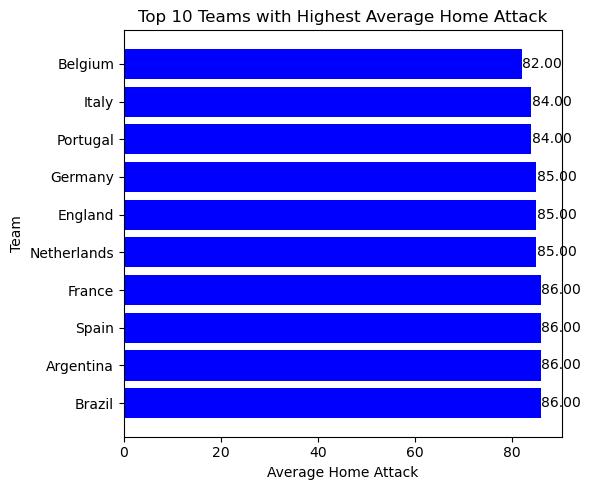

In [710]:
plt.figure(figsize=(6,5))
bars = plt.barh(top_10_home_attack['team_A'], top_10_home_attack['avg_home_attack'], color='blue')
plt.xlabel('Average Home Attack')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Average Home Attack')

for bar, attack in zip(bars, top_10_home_attack['avg_home_attack']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{attack:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Top 10 attacking teams at Away matches

In [711]:
top_10_away_attack = df_2.groupby('team_B')['avg_away_attack'].mean().reset_index().sort_values(by='avg_away_attack', ascending=False).head(10)
top_10_away_attack

,team_B,avg_away_attack
27,Brazil,86.0
8,Argentina,86.0
174,Spain,86.0
71,France,86.0
62,England,85.0
75,Germany,85.0
152,Portugal,84.0
134,Netherlands,84.0
95,Italy,84.0
19,Belgium,82.0


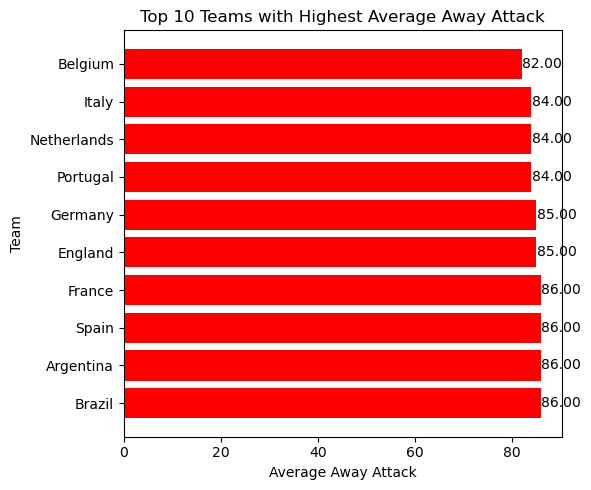

In [712]:
plt.figure(figsize=(6,5))
bars = plt.barh(top_10_away_attack['team_B'], top_10_away_attack['avg_away_attack'], color='red')

plt.xlabel('Average Away Attack')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Average Away Attack')

for bar, attack in zip(bars, top_10_away_attack['avg_away_attack']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{attack:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Top 10 attacking teams combined Home & Away matches

In [713]:
teams_attack = df_2[['team_A', 'team_B','avg_home_attack','avg_away_attack']]
home_team = teams_attack[['team_A','avg_home_attack']].rename(columns={"team_A":"team","avg_home_attack":"attack_rate"})
away_team = teams_attack[['team_B','avg_away_attack']].rename(columns={"team_B":"team","avg_away_attack":"attack_rate"})
teams_attack = pd.concat([home_team,away_team])
teams_attack = teams_attack.sort_values(['team'],ascending=[False])
top_10_teams_attacking_teams = teams_attack.groupby('team').first().sort_values('attack_rate',ascending=False)[0:10].reset_index()
top_10_teams_attacking_teams

,team,attack_rate
0,Spain,86.0
1,France,86.0
2,Brazil,86.0
3,Argentina,86.0
4,Germany,85.0
5,England,85.0
6,Portugal,84.0
7,Italy,84.0
8,Netherlands,84.0
9,Belgium,82.0


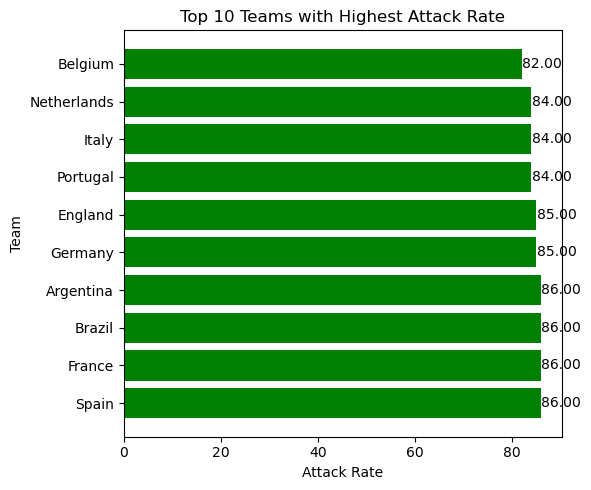

In [714]:
plt.figure(figsize=(6,5))
bars = plt.barh(top_10_teams_attacking_teams['team'], top_10_teams_attacking_teams['attack_rate'], color='green')

plt.xlabel('Attack Rate')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Attack Rate')

for bar, attack in zip(bars, top_10_teams_attacking_teams['attack_rate']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{attack:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Top 10 defending teams at Home matches

In [715]:
top_10_home_defense = df_2.groupby('team_A')['avg_home_defense'].mean().reset_index().sort_values(by='avg_home_defense', ascending=False).head(10)
top_10_home_defense

,team_A,avg_home_defense
174,Spain,88.0
75,Germany,87.0
71,France,86.0
27,Brazil,86.0
95,Italy,86.0
62,England,84.0
152,Portugal,82.0
134,Netherlands,82.0
53,Czech Republic,82.0
8,Argentina,82.0


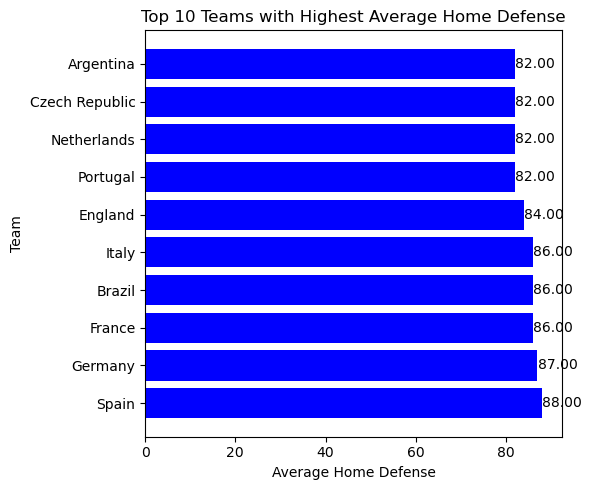

In [716]:
plt.figure(figsize=(6,5))
bars = plt.barh(top_10_home_defense['team_A'], top_10_home_defense['avg_home_defense'], color='blue')

plt.xlabel('Average Home Defense')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Average Home Defense')

for bar, defense in zip(bars, top_10_home_defense['avg_home_defense']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{defense:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Top 10 defending teams at Away matches

In [717]:
top_10_away_defense = df_2.groupby('team_B')['avg_away_defense'].mean().reset_index().sort_values(by='avg_away_defense', ascending=False).head(10)
top_10_away_defense

,team_B,avg_away_defense
174,Spain,87.0
75,Germany,87.0
27,Brazil,86.0
71,France,86.0
95,Italy,86.0
62,England,84.0
152,Portugal,82.0
134,Netherlands,82.0
8,Argentina,82.0
53,Czech Republic,82.0


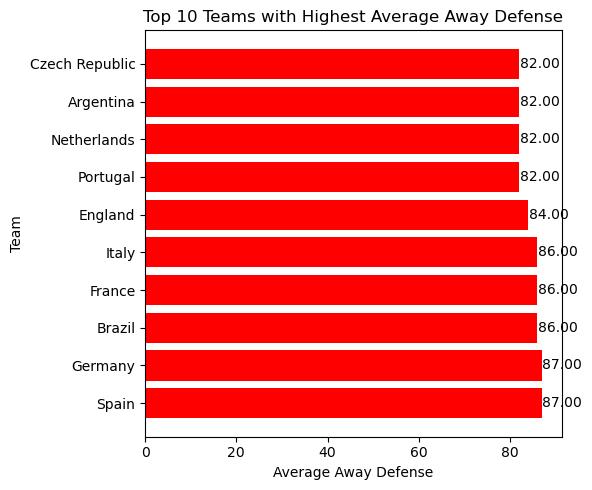

In [718]:
plt.figure(figsize=(6,5))
bars = plt.barh(top_10_away_defense['team_B'], top_10_away_defense['avg_away_defense'], color='red')

plt.xlabel('Average Away Defense')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Average Away Defense')

for bar, defense in zip(bars, top_10_away_defense['avg_away_defense']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{defense:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Top 10 defending teams combined Home & Away matches

In [719]:
teams_defense = df_2[['team_A', 'team_B','avg_home_defense','avg_away_defense']]
home_team = teams_defense[['team_A','avg_home_defense']].rename(columns={"team_A":"team","avg_home_defense":"defense_rate"})
away_team = teams_defense[['team_B','avg_away_defense']].rename(columns={"team_B":"team","avg_away_defense":"defense_rate"})
teams_defense = pd.concat([home_team,away_team])
teams_defense = teams_defense.sort_values(['team'],ascending=[False])
top_10_defensing_teams = teams_defense.groupby('team').first().sort_values('defense_rate',ascending=False)[0:10].reset_index()
top_10_defensing_teams

,team,defense_rate
0,Spain,88.0
1,Germany,87.0
2,France,86.0
3,Italy,86.0
4,Brazil,86.0
5,England,84.0
6,Portugal,82.0
7,Czech Republic,82.0
8,Netherlands,82.0
9,Belgium,82.0


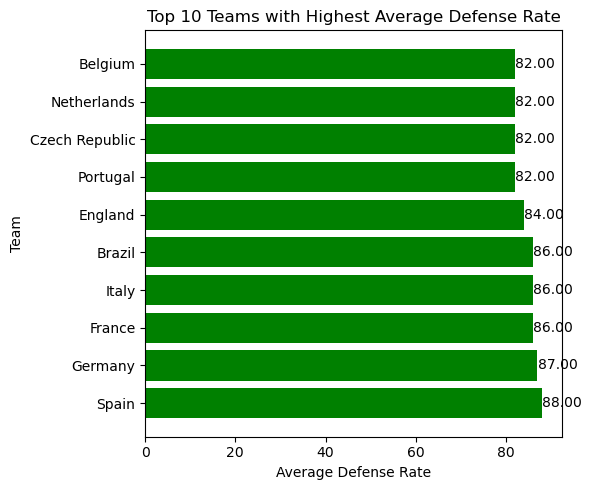

In [720]:
plt.figure(figsize=(6, 5))
bars = plt.barh(top_10_defensing_teams['team'], top_10_defensing_teams['defense_rate'], color='green')

plt.xlabel('Average Defense Rate')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Average Defense Rate')

for bar, defense in zip(bars, top_10_defensing_teams['defense_rate']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{defense:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Average goals scored and conceded by each team Home & Away

In [721]:
df_avg_goals = pd.DataFrame(columns=['team', 'avg_home_goals_scored', 'avg_home_goals_conceded', 'avg_away_goals_scored', 'avg_away_goals_conceded'])

all_teams = df['team_A'].unique()

for team in all_teams:
    home_matches = df[df['team_A'] == team]

    avg_home_goals_scored = home_matches['home_team_score'].mean()
    avg_home_goals_conceded = home_matches['away_team_score'].mean()
    
    away_matches = df[df['team_B'] == team]

    avg_away_goals_scored = away_matches['away_team_score'].mean()
    avg_away_goals_conceded = away_matches['home_team_score'].mean()
    
    df_avg_goals = df_avg_goals.append({'team': team, 
                                        'avg_home_goals_scored': avg_home_goals_scored, 
                                        'avg_home_goals_conceded': avg_home_goals_conceded, 
                                        'avg_away_goals_scored': avg_away_goals_scored, 
                                        'avg_away_goals_conceded': avg_away_goals_conceded}, ignore_index=True)

df_avg_goals.head(15)

,team,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded
0,Bolivia,1.523810,1.182540,0.666667,2.075472
1,Brazil,2.394850,0.605150,1.980000,0.795000
2,Ecuador,1.760274,0.890411,0.952381,1.502646
3,Guinea,1.805825,0.805825,1.089172,1.528662
4,Paraguay,1.520661,0.991736,0.939815,1.370370
5,Peru,1.478571,1.028571,0.849711,1.502890
6,Zimbabwe,1.518519,0.800000,1.122905,1.279330
7,Faroe Islands,0.872340,2.000000,0.600000,2.550000
8,Sweden,1.786127,0.826590,1.305825,1.058252
9,Australia,2.573964,0.751479,1.405797,1.188406


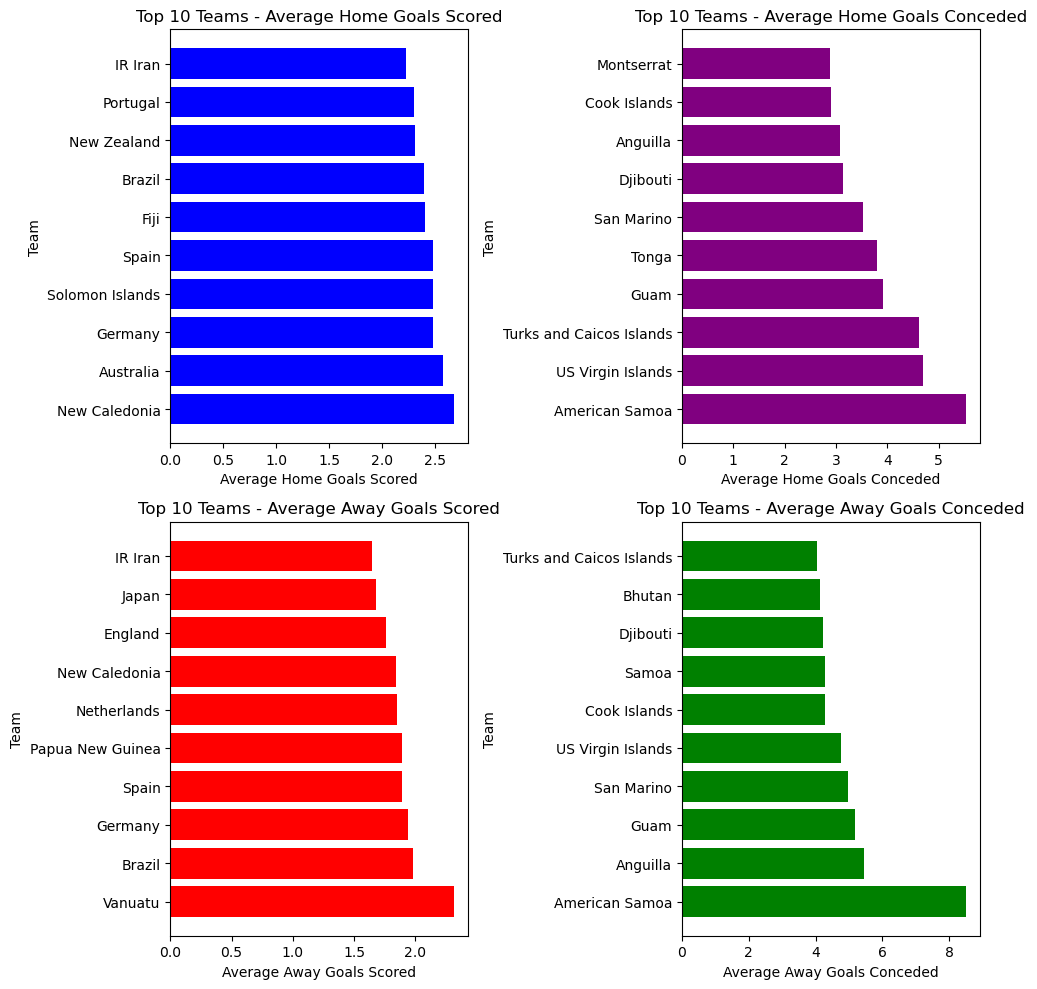

In [722]:
sorted_home_goals_scored = df_avg_goals.sort_values('avg_home_goals_scored', ascending=False).head(10)
sorted_home_goals_conceded = df_avg_goals.sort_values('avg_home_goals_conceded', ascending=False).head(10)
sorted_away_goals_scored = df_avg_goals.sort_values('avg_away_goals_scored', ascending=False).head(10)
sorted_away_goals_conceded = df_avg_goals.sort_values('avg_away_goals_conceded', ascending=False).head(10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0, 0].barh(sorted_home_goals_scored['team'], sorted_home_goals_scored['avg_home_goals_scored'], color='blue')
axes[0, 0].set_xlabel('Average Home Goals Scored')
axes[0, 0].set_ylabel('Team')
axes[0, 0].set_title('Top 10 Teams - Average Home Goals Scored')

axes[0, 1].barh(sorted_home_goals_conceded['team'], sorted_home_goals_conceded['avg_home_goals_conceded'], color='purple')
axes[0, 1].set_xlabel('Average Home Goals Conceded')
axes[0, 1].set_ylabel('Team')
axes[0, 1].set_title('Top 10 Teams - Average Home Goals Conceded')

axes[1, 0].barh(sorted_away_goals_scored['team'], sorted_away_goals_scored['avg_away_goals_scored'], color='red')
axes[1, 0].set_xlabel('Average Away Goals Scored')
axes[1, 0].set_ylabel('Team')
axes[1, 0].set_title('Top 10 Teams - Average Away Goals Scored')

axes[1, 1].barh(sorted_away_goals_conceded['team'], sorted_away_goals_conceded['avg_away_goals_conceded'], color='green')
axes[1, 1].set_xlabel('Average Away Goals Conceded')
axes[1, 1].set_ylabel('Team')
axes[1, 1].set_title('Top 10 Teams - Average Away Goals Conceded')

plt.tight_layout()
plt.show()

In [723]:
df['avg_home_goals_scored'] = 0.0
df['avg_home_goals_conceded'] = 0.0
df['avg_away_goals_scored'] = 0.0
df['avg_away_goals_conceded'] = 0.0

for index, row in df_avg_goals.iterrows():
    team = row['team']
    
    df.loc[(df['team_A'] == team), 'avg_home_goals_scored'] = row['avg_home_goals_scored']
    df.loc[(df['team_A'] == team), 'avg_home_goals_conceded'] = row['avg_home_goals_conceded']

    df.loc[(df['team_B'] == team), 'avg_away_goals_scored'] = row['avg_away_goals_scored']
    df.loc[(df['team_B'] == team), 'avg_away_goals_conceded'] = row['avg_away_goals_conceded']

df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108,72.0,64.0,66.0,56.0,1.805825,0.805825,0.523810,1.821429
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153,63.0,64.0,50.0,50.0,0.871560,1.522936,0.260870,2.989130
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135,50.0,58.0,66.0,65.0,0.448980,2.418367,1.000000,1.651316
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60,79.0,76.0,77.0,71.0,1.809524,1.005952,0.994949,1.191919
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35,75.0,72.0,72.0,68.0,1.903571,0.975000,1.189024,1.170732


### Average winning percentage for each team over time 

In [724]:
def home_percentage(team):
    total_home_matches = len(df[df['team_A'] == team])
    if total_home_matches == 0:
        return 0
    else:
        home_wins = len(df[(df['team_A'] == team) & (df['team_A_result'] == "Win")])
        return round((home_wins / total_home_matches) * 100)

def away_percentage(team):
    total_away_matches = len(df[df['team_B'] == team])
    if total_away_matches == 0:
        return 0
    else:
        away_losses = len(df[(df['team_B'] == team) & (df['team_A_result'] == "Lose")])
        return round((away_losses / total_away_matches) * 100)

df_avg_goals['Home_win_Per'] = np.vectorize(home_percentage)(df_avg_goals['team'])
df_avg_goals['Away_win_Per'] = np.vectorize(away_percentage)(df_avg_goals['team'])
df_avg_goals['Average_win_Per'] = round((df_avg_goals['Home_win_Per'] + df_avg_goals['Away_win_Per']) / 2)

Teams_winning_percentage = df_avg_goals[['team', 'Home_win_Per', 'Away_win_Per', 'Average_win_Per']]

top_10_teams = Teams_winning_percentage.nlargest(10, 'Average_win_Per')
sorted_top_10_teams = top_10_teams.sort_values('Average_win_Per', ascending=False)
sorted_top_10_teams

,team,Home_win_Per,Away_win_Per,Average_win_Per
1,Brazil,78,60,69.0
28,Spain,77,61,69.0
45,France,66,57,62.0
46,Germany,63,59,61.0
54,IR Iran,70,48,59.0
13,Argentina,68,49,58.0
21,England,64,51,58.0
48,Netherlands,62,55,58.0
50,Portugal,67,49,58.0
47,Italy,60,49,54.0


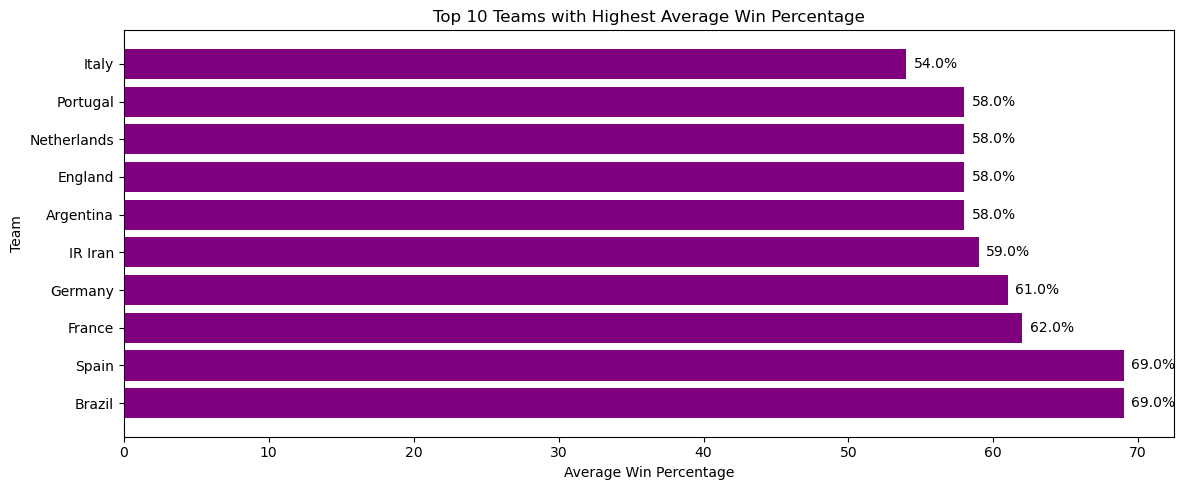

In [725]:
plt.figure(figsize=(12, 5))
bars = plt.barh(sorted_top_10_teams['team'], sorted_top_10_teams['Average_win_Per'], color='purple')

plt.xlabel('Average Win Percentage')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Average Win Percentage')

for bar, win_percentage in zip(bars, sorted_top_10_teams['Average_win_Per']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{win_percentage}%', ha='left', va='center')

plt.tight_layout()
plt.show()

In [726]:
df['team_A_average_win_Per'] = 0.0
df['team_B_average_win_Per'] = 0.0

for index, row in Teams_winning_percentage.iterrows():
    team = row['team']
    
    df.loc[(df['team_A'] == team), 'team_A_average_win_Per'] = row['Average_win_Per']
    
    
    df.loc[(df['team_B'] == team), 'team_B_average_win_Per'] = row['Average_win_Per']

df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108,72.0,64.0,66.0,56.0,1.805825,0.805825,0.523810,1.821429,42.0,33.0
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153,63.0,64.0,50.0,50.0,0.871560,1.522936,0.260870,2.989130,18.0,6.0
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135,50.0,58.0,66.0,65.0,0.448980,2.418367,1.000000,1.651316,7.0,28.0
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60,79.0,76.0,77.0,71.0,1.809524,1.005952,0.994949,1.191919,44.0,46.0
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35,75.0,72.0,72.0,68.0,1.903571,0.975000,1.189024,1.170732,52.0,47.0


### Pre-processing

### Goal difference 

In [727]:
df['goal_difference'] = df['home_team_score'] - df['away_team_score']
df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0,5
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108,72.0,64.0,66.0,56.0,1.805825,0.805825,0.523810,1.821429,42.0,33.0,1
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153,63.0,64.0,50.0,50.0,0.871560,1.522936,0.260870,2.989130,18.0,6.0,1
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135,50.0,58.0,66.0,65.0,0.448980,2.418367,1.000000,1.651316,7.0,28.0,-2
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60,79.0,76.0,77.0,71.0,1.809524,1.005952,0.994949,1.191919,44.0,46.0,0
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35,75.0,72.0,72.0,68.0,1.903571,0.975000,1.189024,1.170732,52.0,47.0,-3


In [728]:
df['team_A_result'] = df['team_A_result'].replace({'Win': 1, 'Draw': 2, 'Lose': 0})
df

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0,5
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108,72.0,64.0,66.0,56.0,1.805825,0.805825,0.523810,1.821429,42.0,33.0,1
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,1,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153,63.0,64.0,50.0,50.0,0.871560,1.522936,0.260870,2.989130,18.0,6.0,1
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,0,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135,50.0,58.0,66.0,65.0,0.448980,2.418367,1.000000,1.651316,7.0,28.0,-2
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60,79.0,76.0,77.0,71.0,1.809524,1.005952,0.994949,1.191919,44.0,46.0,0
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35,75.0,72.0,72.0,68.0,1.903571,0.975000,1.189024,1.170732,52.0,47.0,-3


#### outliers

In [729]:
sum_goal_difference = df.loc[(df['goal_difference'] > 5) | (df['goal_difference'] < -5), 'goal_difference'].sum()

print("Sum of rows in the 'goal_difference' column with values +5 or -5:")
print(sum_goal_difference)

Sum of rows in the 'goal_difference' column with values +5 or -5:
2504


In [730]:
df_3 = df[(df['goal_difference'] < 5) & (df['goal_difference'] > -5)]
df_3

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Guinea,No,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,80,108,72.0,64.0,66.0,56.0,1.805825,0.805825,0.523810,1.821429,42.0,33.0,1
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2
5,1993-08-08,Peru,Colombia,70,19,0,1,Peru,No,0,68.0,78.0,72.0,76.0,74.0,79.0,80.0,78.0,22,17,75.0,70.0,79.0,78.0,1.478571,1.028571,1.131313,1.080808,36.0,47.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,2,1,Moldova,No,1,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,180,153,63.0,64.0,50.0,50.0,0.871560,1.522936,0.260870,2.989130,18.0,6.0,1
23917,2022-06-14,Liechtenstein,Latvia,192,135,0,2,Liechtenstein,No,0,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,192,135,50.0,58.0,66.0,65.0,0.448980,2.418367,1.000000,1.651316,7.0,28.0,-2
23918,2022-06-14,Chile,Ghana,28,60,0,0,Japan,Yes,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,28,60,79.0,76.0,77.0,71.0,1.809524,1.005952,0.994949,1.191919,44.0,46.0,0
23919,2022-06-14,Japan,Tunisia,23,35,0,3,Japan,No,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,23,35,75.0,72.0,72.0,68.0,1.903571,0.975000,1.189024,1.170732,52.0,47.0,-3


In [739]:
fifa_qatar_2022 = ['Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England',
             'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Costa Rica', 'Germany', 'Denmark', 'Brazil', 'France',
             'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA',
             'Mexico', 'Wales', 'Australia', 'Qatar']


teams_filter = df['team_A'].isin(fifa_qatar_2022) | df['team_B'].isin(fifa_qatar_2022)

qatar_fifa_22 = df[teams_filter]
qatar_fifa_22.head(5)

,date,team_A,team_B,team_A_rank,team_B_rank,home_team_score,away_team_score,country,shoot_out,team_A_result,team_A_goalkeeper_rate,team_B_goalkeeper_rate,team_A_defense_rate,team_A_offense_rate,team_A_midfield_rate,team_B_defense_rate,team_B_offense_rate,team_B_midfield_rate,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,Bolivia,No,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2
1,1993-08-08,Brazil,Mexico,8,14,1,1,Brazil,No,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,Ecuador,No,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0,5
4,1993-08-08,Paraguay,Argentina,67,5,1,3,Paraguay,No,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2
9,1993-08-11,Sweden,Switzerland,4,3,1,2,Sweden,No,0,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0,19,14,80.0,76.0,78.0,80.0,1.786127,0.826590,1.326389,1.152778,49.0,46.0,-1


In [740]:
qatar_fifa_22 = qatar_fifa_22.drop(['team_A_defense_rate', 'team_A_midfield_rate','team_A_offense_rate','team_A_goalkeeper_rate',
                        'team_B_goalkeeper_rate','team_B_offense_rate','team_B_midfield_rate','team_B_defense_rate',
                        'country','shoot_out','team_B_rank','home_team_score', 'away_team_score','team_A_rank'],axis=1)
qatar_fifa_22.head()

,date,team_A,team_B,team_A_result,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference
0,1993-08-08,Bolivia,Uruguay,1,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2
1,1993-08-08,Brazil,Mexico,2,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0
2,1993-08-08,Ecuador,Venezuela,1,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0,5
4,1993-08-08,Paraguay,Argentina,0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2
9,1993-08-11,Sweden,Switzerland,0,19,14,80.0,76.0,78.0,80.0,1.786127,0.826590,1.326389,1.152778,49.0,46.0,-1


In [741]:
teams = list(set(qatar_fifa_22['team_A'].unique()) | set(qatar_fifa_22['team_B'].unique()))

team_mapping = {team: code for code, team in enumerate(teams, 1)}

In [742]:
qatar_fifa_22['team_A_code'] = qatar_fifa_22['team_A'].map(team_mapping)
qatar_fifa_22['team_B_code'] = qatar_fifa_22['team_B'].map(team_mapping)
qatar_fifa_22.head(5)

,date,team_A,team_B,team_A_result,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference,team_A_code,team_B_code
0,1993-08-08,Bolivia,Uruguay,1,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2,44,8
1,1993-08-08,Brazil,Mexico,2,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0,156,46
2,1993-08-08,Ecuador,Venezuela,1,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0,5,158,164
4,1993-08-08,Paraguay,Argentina,0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2,103,200
9,1993-08-11,Sweden,Switzerland,0,19,14,80.0,76.0,78.0,80.0,1.786127,0.826590,1.326389,1.152778,49.0,46.0,-1,65,205


In [743]:
team_name = 'Brazil'

code_number = team_mapping.get(team_name)
print(f"The code number for {team_name} is: {code_number}")

code_number = 200
team_name = next((team for team, code in team_mapping.items() if code == code_number), None)
print(f"The team name for code number {code_number} is: {team_name}")

The code number for Brazil is: 156
The team name for code number 200 is: Argentina


In [744]:
qatar_fifa_22.head()

,date,team_A,team_B,team_A_result,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,team_B_average_win_Per,goal_difference,team_A_code,team_B_code
0,1993-08-08,Bolivia,Uruguay,1,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,48.0,2,44,8
1,1993-08-08,Brazil,Mexico,2,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,50.0,0,156,46
2,1993-08-08,Ecuador,Venezuela,1,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,28.0,5,158,164
4,1993-08-08,Paraguay,Argentina,0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,58.0,-2,103,200
9,1993-08-11,Sweden,Switzerland,0,19,14,80.0,76.0,78.0,80.0,1.786127,0.826590,1.326389,1.152778,49.0,46.0,-1,65,205


In [749]:
qatar_fifa_rank = qatar_fifa_22[['date','team_A','team_B','rank_team_A', 'rank_team_B','team_A_code','team_B_code']]
home = qatar_fifa_rank[['date','team_A','rank_team_A','team_A_code']].rename(columns={"team_A":"team","rank_team_A":"rank",'team_A_code':'team_code'})
away = qatar_fifa_rank[['date','team_B','rank_team_B','team_B_code']].rename(columns={"team_B":"team","rank_team_B":"rank",'team_B_code':'team_code'})
qatar_rank = pd.concat([home,away])

qatar_rank = qatar_rank.sort_values(['team','date'],ascending=[True,False])
qatar_rank = qatar_rank.groupby('team').first().sort_values('rank',ascending=True)[:].reset_index()
qatar_rank.head()

,team,date,rank,team_code
0,Brazil,2022-06-06,1,156
1,Belgium,2022-06-14,2,26
2,France,2022-06-13,3,181
3,Argentina,2022-06-05,4,200
4,England,2022-06-14,5,140


In [751]:
worldcup_top16 = qatar_rank[qatar_rank['team'].isin(fifa_qatar_2022)]

worldcup_top16 = worldcup_top16.sort_values('rank').head(16).copy()

worldcup_top16.reset_index(drop=True, inplace=True)

worldcup_top16

,team,date,rank,team_code
0,Brazil,2022-06-06,1,156
1,Belgium,2022-06-14,2,26
2,France,2022-06-13,3,181
3,Argentina,2022-06-05,4,200
4,England,2022-06-14,5,140
5,Spain,2022-06-12,7,109
6,Portugal,2022-06-12,8,29
7,Mexico,2022-06-14,9,46
8,Netherlands,2022-06-14,10,90
9,Denmark,2022-06-13,11,31


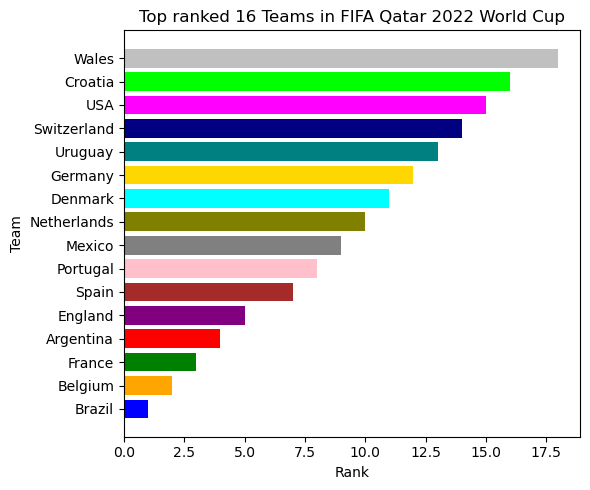

In [752]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'gold', 'teal', 'navy', 'magenta', 'lime', 'silver']

worldcup_top16 = worldcup_top16.sort_values('rank').head(16).copy()

worldcup_top16.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6, 5))
bars = plt.barh(worldcup_top16['team'], worldcup_top16['rank'], color=colors[:len(worldcup_top16)])

plt.xlabel('Rank')
plt.ylabel('Team')
plt.title('Top ranked 16 Teams in FIFA Qatar 2022 World Cup')


plt.tight_layout()
plt.show()

In [753]:
teams = worldcup_top16['team_code'].tolist()
teams

[156, 26, 181, 200, 140, 109, 29, 46, 90, 31, 63, 8, 205, 73, 154, 119]

In [754]:
qatar_fifa_22 = qatar_fifa_22.drop(['date','team_B','team_A','team_B_average_win_Per','team_B_code'],axis=1)
qatar_fifa_22.head()

,team_A_result,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,goal_difference,team_A_code
0,1,76,13,68.0,67.0,81.0,79.0,1.523810,1.182540,1.273196,1.335052,24.0,2,44
1,2,1,9,86.0,86.0,78.0,78.0,2.394850,0.605150,1.422886,1.228856,69.0,0,156
2,1,46,58,75.0,71.0,74.0,70.0,1.760274,0.890411,0.804734,1.905325,40.0,5,158
4,0,50,4,76.0,74.0,86.0,82.0,1.520661,0.991736,1.570621,1.084746,39.0,-2,103
9,0,19,14,80.0,76.0,78.0,80.0,1.786127,0.826590,1.326389,1.152778,49.0,-1,65


In [755]:
qatar_fifa_22 = qatar_fifa_22.astype(int)
qatar_fifa_22.head()

,team_A_result,rank_team_A,rank_team_B,avg_home_attack,avg_home_defense,avg_away_attack,avg_away_defense,avg_home_goals_scored,avg_home_goals_conceded,avg_away_goals_scored,avg_away_goals_conceded,team_A_average_win_Per,goal_difference,team_A_code
0,1,76,13,68,67,81,79,1,1,1,1,24,2,44
1,2,1,9,86,86,78,78,2,0,1,1,69,0,156
2,1,46,58,75,71,74,70,1,0,0,1,40,5,158
4,0,50,4,76,74,86,82,1,0,1,1,39,-2,103
9,0,19,14,80,76,78,80,1,0,1,1,49,-1,65


In [413]:
qatar_fifa_22.corr()['team_A_average_win_Per'].sort_values(ascending=False)

team_A_average_win_Per     1.000000
avg_home_attack            0.727205
avg_home_defense           0.709710
avg_home_goals_scored      0.697723
goal_difference            0.392976
team_A_result              0.182920
rank_team_B                0.157577
avg_away_goals_conceded    0.125748
team_A_code                0.040789
avg_away_attack           -0.070066
avg_away_defense          -0.071112
avg_away_goals_scored     -0.119366
avg_home_goals_conceded   -0.586949
rank_team_A               -0.793326
Name: team_A_average_win_Per, dtype: float64

<AxesSubplot:>

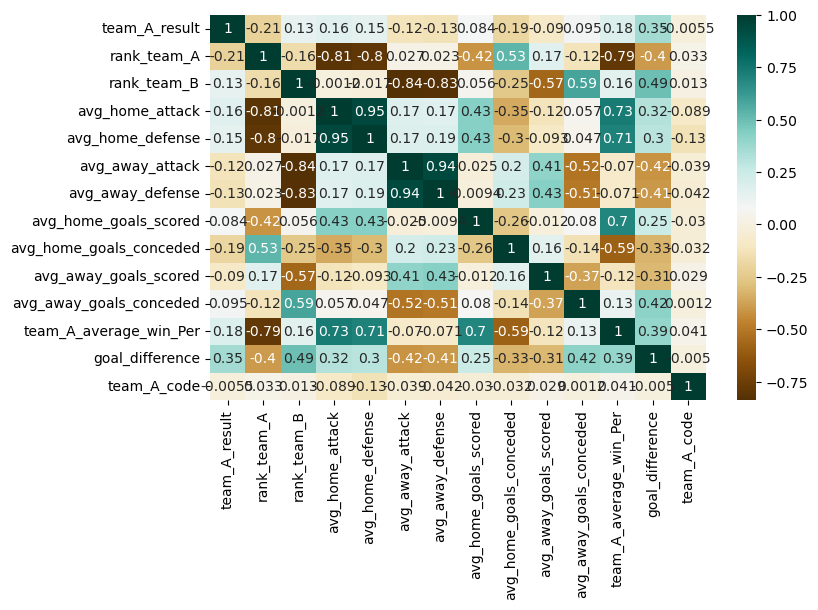

In [762]:
plt.figure(figsize=(8,5),dpi=100)
sns.heatmap(qatar_fifa_22.corr(),annot=True, cmap='BrBG')

In [763]:
qatar_fifa_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9321 entries, 0 to 23920
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   team_A_result            9321 non-null   int32
 1   rank_team_A              9321 non-null   int32
 2   rank_team_B              9321 non-null   int32
 3   avg_home_attack          9321 non-null   int32
 4   avg_home_defense         9321 non-null   int32
 5   avg_away_attack          9321 non-null   int32
 6   avg_away_defense         9321 non-null   int32
 7   avg_home_goals_scored    9321 non-null   int32
 8   avg_home_goals_conceded  9321 non-null   int32
 9   avg_away_goals_scored    9321 non-null   int32
 10  avg_away_goals_conceded  9321 non-null   int32
 11  team_A_average_win_Per   9321 non-null   int32
 12  goal_difference          9321 non-null   int32
 13  team_A_code              9321 non-null   int32
dtypes: int32(14)
memory usage: 582.6 KB


## Modeling

In [765]:
X = qatar_fifa_22.drop("team_A_average_win_Per", axis=1)
y = qatar_fifa_22["team_A_average_win_Per"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [766]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    AdaBoostClassifier(),
    MLPClassifier(),
    SVC()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model.__class__.__name__} accuracy: {accuracy_score(y_test, model.predict(X_test))}, validation test score: {np.mean(scores)}')
    print(f'{model.__class__.__name__} F1 score: {f1_score(y_test, model.predict(X_test), average="weighted")}')

DecisionTreeClassifier accuracy: 0.9951742627345844, validation test score: 0.9950375173291761
DecisionTreeClassifier F1 score: 0.9953174666577377
RandomForestClassifier accuracy: 0.9924932975871313, validation test score: 0.9938308132980186
RandomForestClassifier F1 score: 0.9916642122452469
LogisticRegression accuracy: 0.6793565683646112, validation test score: 0.651690032959149
LogisticRegression F1 score: 0.6619214680173687
AdaBoostClassifier accuracy: 0.13780160857908846, validation test score: 0.1130643557502297
AdaBoostClassifier F1 score: 0.048901621650383933
MLPClassifier accuracy: 0.9865951742627346, validation test score: 0.980419064880795
MLPClassifier F1 score: 0.9859087544819078
SVC accuracy: 0.8214477211796246, validation test score: 0.7872844753957166
SVC F1 score: 0.8083538221990909


In [769]:
# the hyperparameters to tune for the DecisionTreeClassifier
dtc_params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}
#  the hyperparameters to tune for the RandomForestClassifier
rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}
#  the hyperparameters to tune for the LogisticRegression
lr_params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}
#  the hyperparameters to tune for the AdaBoostClassifier
abc_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}
#  the hyperparameters to tune for the MLPClassifier
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
#  the hyperparameters to tune for the SVC
svc_params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [770]:
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(), dtc_params)
rfc_grid_search = GridSearchCV(RandomForestClassifier(), rfc_params)
lr_grid_search = GridSearchCV(LogisticRegression(), lr_params)
abc_grid_search = GridSearchCV(AdaBoostClassifier(), abc_params)
mlp_grid_search = GridSearchCV(MLPClassifier(), mlp_params)
svc_grid_search = GridSearchCV(SVC(), svc_params)

dtc_grid_search.fit(X_train, y_train)
rfc_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)
abc_grid_search.fit(X_train, y_train)
mlp_grid_search.fit(X_train, y_train)
svc_grid_search.fit(X_train, y_train)

print(f"DecisionTreeClassifier best parameters: {dtc_grid_search.best_params_}")
print(f"RandomForestClassifier best parameters: {rfc_grid_search.best_params_}")
print(f"LogisticRegression best parameters: {lr_grid_search.best_params_}")
print(f"AdaBoostClassifier best parameters: {abc_grid_search.best_params_}")
print(f"MLPClassifier best parameters: {mlp_grid_search.best_params_}")
print(f"SVC best parameters: {svc_grid_search.best_params_}")

DecisionTreeClassifier best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
RandomForestClassifier best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
LogisticRegression best parameters: {'C': 10.0, 'penalty': 'l2'}
AdaBoostClassifier best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
MLPClassifier best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}
SVC best parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [771]:
models = [
    DecisionTreeClassifier(max_depth=dtc_grid_search.best_params_['max_depth'], min_samples_split=dtc_grid_search.best_params_['min_samples_split'], min_samples_leaf=dtc_grid_search.best_params_['min_samples_leaf']),
    RandomForestClassifier(n_estimators=rfc_grid_search.best_params_['n_estimators'], max_depth=rfc_grid_search.best_params_['max_depth'], min_samples_split=rfc_grid_search.best_params_['min_samples_split'], min_samples_leaf=rfc_grid_search.best_params_['min_samples_leaf']),
    LogisticRegression(C=lr_grid_search.best_params_['C'], penalty=lr_grid_search.best_params_['penalty']),
    AdaBoostClassifier(n_estimators=abc_grid_search.best_params_['n_estimators'], learning_rate=abc_grid_search.best_params_['learning_rate']),
    MLPClassifier(hidden_layer_sizes=mlp_grid_search.best_params_['hidden_layer_sizes'], activation=mlp_grid_search.best_params_['activation'], alpha=mlp_grid_search.best_params_['alpha']),
    SVC(C=svc_grid_search.best_params_['C'], kernel=svc_grid_search.best_params_['kernel'], gamma=svc_grid_search.best_params_['gamma'])
]

for model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model.__class__.__name__} accuracy: {accuracy_score(y_test, model.predict(X_test))}, validation test score: {np.mean(scores)}')
    print(f'{model.__class__.__name__} F1 score: {f1_score(y_test, model.predict(X_test), average="weighted")}')

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__} MAE: {mae}, R2 Score: {r2}')

DecisionTreeClassifier accuracy: 0.749597855227882, validation test score: 0.7458425261128883
DecisionTreeClassifier F1 score: 0.7123985585174092
RandomForestClassifier accuracy: 0.8675603217158177, validation test score: 0.8654749767595744
RandomForestClassifier F1 score: 0.8492618865656585
LogisticRegression accuracy: 0.7142091152815013, validation test score: 0.6821349904610865
LogisticRegression F1 score: 0.702726649246501
AdaBoostClassifier accuracy: 0.18552278820375334, validation test score: 0.17958861300061316
AdaBoostClassifier F1 score: 0.10780359487908789
MLPClassifier accuracy: 0.9973190348525469, validation test score: 0.9959766642751955
MLPClassifier F1 score: 0.9973840100210941
SVC accuracy: 0.9522788203753351, validation test score: 0.940987569743753
SVC F1 score: 0.9496935320079791
DecisionTreeClassifier MAE: 2.1345844504021447, R2 Score: 0.745103577428641
RandomForestClassifier MAE: 1.1302949061662197, R2 Score: 0.8927647923471601
LogisticRegression MAE: 1.58552278820

## Evaluation 

RandomForestClassifier Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
          12       0.77      1.00      0.87        10
          14       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         2
          18       1.00      1.00      1.00        10
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         7
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       1.00      0.12      0.21        25
          25       0.00      0.00      0.00         9
          26       0.88      0.41      0.56        17
          27       0.00      0.00      0.00         3
          28       1.00      0.55      0.71        20
          29       0.00      0.00      0.00      

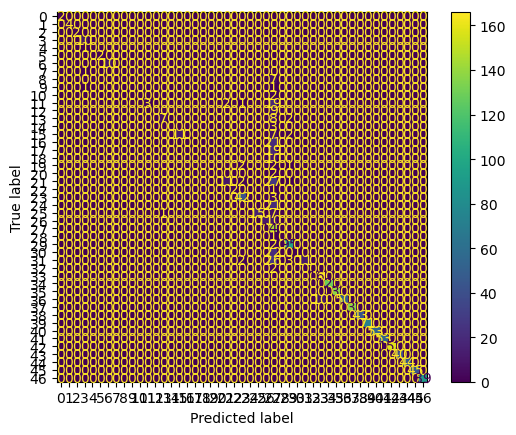

In [775]:
rfc = RandomForestClassifier(n_estimators=rfc_grid_search.best_params_['n_estimators'], 
                             max_depth=rfc_grid_search.best_params_['max_depth'], 
                             min_samples_split=rfc_grid_search.best_params_['min_samples_split'], 
                             min_samples_leaf=rfc_grid_search.best_params_['min_samples_leaf'])
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("RandomForestClassifier Metrics:")
print(classification_report(y_test, y_pred_rfc))

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = ConfusionMatrixDisplay(cm_rfc)
cm_display_rfc.plot()

SVC Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
          12       0.83      1.00      0.91        10
          14       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         2
          18       1.00      0.90      0.95        10
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         7
          22       1.00      0.50      0.67         2
          23       0.00      0.00      0.00         2
          24       0.86      0.76      0.81        25
          25       0.88      0.78      0.82         9
          26       0.84      0.94      0.89        17
          27       1.00      1.00      1.00         3
          28       0.95      0.90      0.92        20
          29  

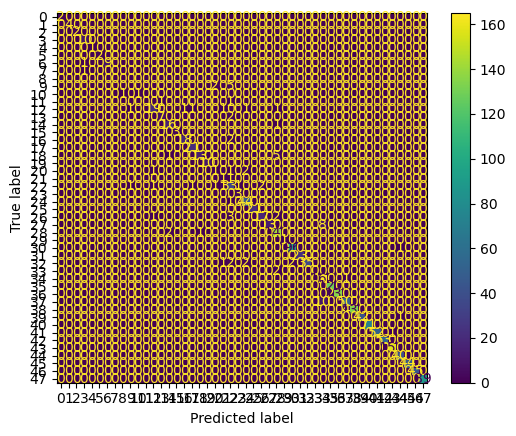

In [776]:
svc = SVC(C=svc_grid_search.best_params_['C'], 
          kernel=svc_grid_search.best_params_['kernel'], 
          gamma=svc_grid_search.best_params_['gamma'])
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVC Metrics:")
print(classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_display_svc = ConfusionMatrixDisplay(cm_svc)
cm_display_svc.plot()

In [778]:
svc_model = SVC(kernel='rbf', C=10.0, gamma='scale', probability=True)

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)


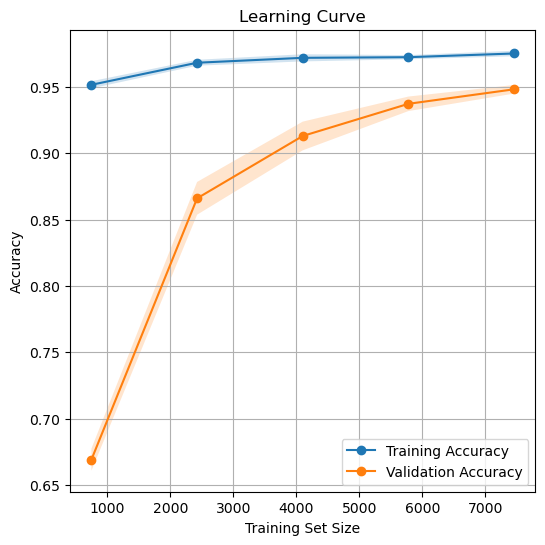

In [781]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(6, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(svc_model, X_scaled, y)

## Simulation of the winner

In [783]:
teams = worldcup_top16['team_code'].tolist()
teams

[156, 26, 181, 200, 140, 109, 29, 46, 90, 31, 63, 8, 205, 73, 154, 119]

In [790]:
# List of 16 teams
teams = [156, 26, 181, 200, 140, 109, 29, 46, 90, 31, 63, 8, 205, 73, 154, 119]

team_names = dict(zip(worldcup_top16['team_code'], worldcup_top16['team']))

def simulate_match(team1, team2):
    features_team1 = qatar_fifa_22.loc[qatar_fifa_22['team_A_code'] == team1, ['team_A_code', 'avg_home_goals_scored', 'avg_home_attack', 'avg_home_defense', 'goal_difference',
                                                                  'team_A_result', 'rank_team_A', 'rank_team_B', 'avg_away_goals_conceded', 'avg_away_attack',
                                                                  'avg_away_defense', 'avg_away_goals_scored', 'avg_home_goals_conceded']]
    features_team2 = qatar_fifa_22.loc[qatar_fifa_22['team_A_code'] == team2, ['team_A_code', 'avg_home_goals_scored', 'avg_home_attack', 'avg_home_defense', 'goal_difference',
                                                                  'team_A_result', 'rank_team_A', 'rank_team_B', 'avg_away_goals_conceded', 'avg_away_attack',
                                                                  'avg_away_defense', 'avg_away_goals_scored', 'avg_home_goals_conceded']]

    if features_team1.empty or features_team2.empty:
        return None

    num_matches = min(features_team1.shape[0], features_team2.shape[0])
    features_team1 = features_team1.sample(n=num_matches, replace=False, random_state=42)
    features_team2 = features_team2.sample(n=num_matches, replace=False, random_state=42)

    prediction_team1 = svc.predict(features_team1)
    prediction_team2 = svc.predict(features_team2)

    prob_team1 = svc.predict_proba(features_team1)
    prob_team2 = svc.predict_proba(features_team2)

    if np.any(prob_team1[:, 1] > prob_team2[:, 1]):
        return team1
    else:
        return team2

# Simulate the tournament
rounds = ['Quarterfinals', 'Semifinals', 'Final', '3rd Place Match']

# 16th Round
print("16 Round:")
knockout_winners = []
for i in range(0, 16, 2):
    team1 = random.choice(teams)
    teams.remove(team1)
    team2 = random.choice(teams)
    teams.remove(team2)
    winner = simulate_match(team1, team2)
    knockout_winners.append(winner)
    if winner:
        print(f"{team_names[team1]} vs {team_names[team2]}: Winner - {team_names[winner]}")
    else:
        print(f"{team_names[team1]} vs {team_names[team2]}: Match abandoned")
print()

# Quarterfinals
print("Quarterfinals:")
winners_quarterfinals = []
for i in range(0, 8, 2):
    team1 = knockout_winners[i]
    team2 = knockout_winners[i+1]
    winner = simulate_match(team1, team2)
    winners_quarterfinals.append(winner)
    print(f"{team_names[team1]} vs {team_names[team2]}: Winner - {team_names[winner]}")
print()

# Semifinals
print("Semifinals:")
winners_semifinals = []
for i in range(0, 4, 2):
    team1 = winners_quarterfinals[i]
    team2 = winners_quarterfinals[i+1]
    winner = simulate_match(team1, team2)
    winners_semifinals.append(winner)
    print(f"{team_names[team1]} vs {team_names[team2]}: Winner - {team_names[winner]}")
print()

# Final
print("Final:")
team1 = winners_semifinals[0]
team2 = winners_semifinals[1]
winner_final = simulate_match(team1, team2)
print(f"{team_names[team1]} vs {team_names[team2]}: Winner - {team_names[winner_final]}")
print()


16 Round:
Wales vs France: Winner - France
Denmark vs Brazil: Winner - Brazil
Switzerland vs Netherlands: Winner - Netherlands
USA vs Portugal: Winner - Portugal
Croatia vs Mexico: Winner - Mexico
Uruguay vs England: Winner - England
Spain vs Germany: Winner - Germany
Belgium vs Argentina: Winner - Argentina

Quarterfinals:
France vs Brazil: Winner - Brazil
Netherlands vs Portugal: Winner - Portugal
Mexico vs England: Winner - England
Germany vs Argentina: Winner - Argentina

Semifinals:
Brazil vs Portugal: Winner - Portugal
England vs Argentina: Winner - Argentina

Final:
Portugal vs Argentina: Winner - Argentina



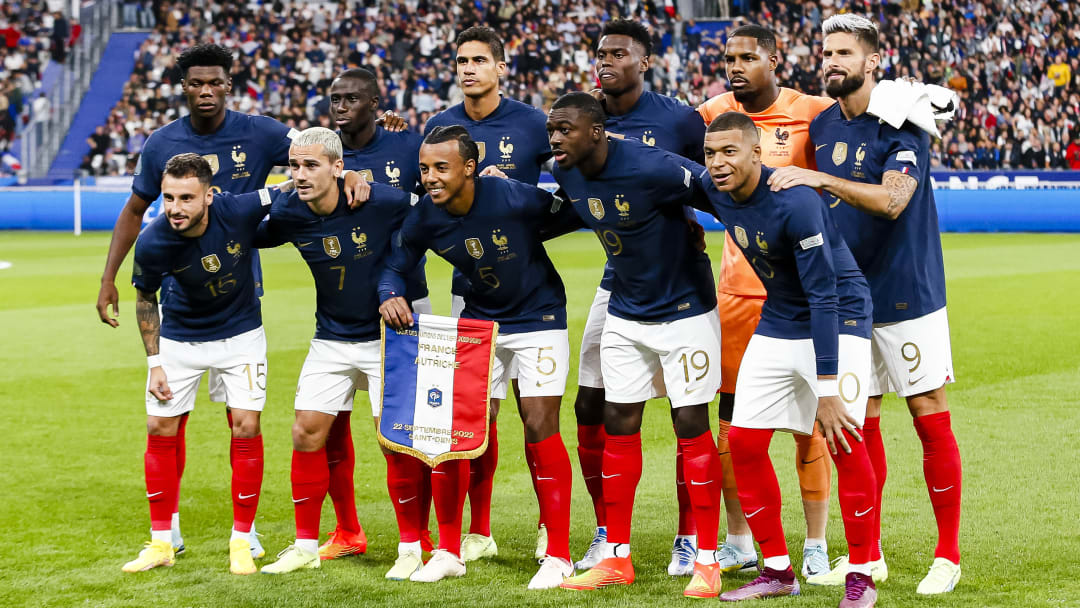

In [794]:
import requests
from IPython.display import Image

image_url = "https://images2.minutemediacdn.com/image/upload/c_crop,w_5000,h_2812,x_0,y_317/c_fill,w_1080,ar_16:9,f_auto,q_auto,g_auto/images%2FGettyImages%2Fmmsport%2F90min_en_international_web%2F01ghezx9g7724c18tv6b.jpg"
response = requests.get(image_url)
Image(response.content)